In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

## Define nBases; the amount of image compression
*** Higher values gives a higher quality image (lower image comression). ***
_Below, we will create and plot the image with k = nBases, nBases/5 and nBases/20_

In [2]:
nBases = 400

## Reading and plotting the original image file

Size of the orignal image is 818 x 1440 x 3
The original image takes    3451 KB of memory


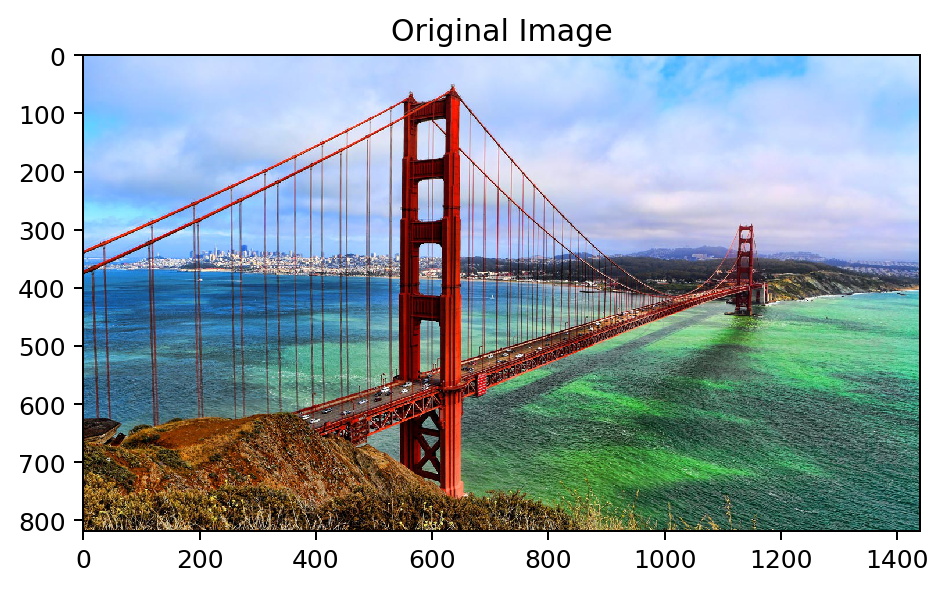

In [3]:
origImage = misc.imread('Golden-Gate-Bridge.jpg')
origMemory = origImage.size / 1024;

plt.figure(dpi=180)
plt.imshow(origImage)
plt.title('Original Image')

print('Size of the orignal image is %d x %d x %d'% origImage.shape);
print('The original image takes %7.0f KB of memory'% origMemory)

## Reshaping the 3D image variable to a 2D one
** This is because SVD can be applied to 2D matrices **

In [4]:
unrolledImage = origImage.reshape((origImage.shape[0], origImage.shape[1] * origImage.shape[2]), order='F')
# This is equivalent to
# unrolledImage = np.zeros((origImage.shape[0], origImage.shape[1] * origImage.shape[2]))
# unrolledImage[:,                    :  origImage.shape[1]] = origImage[:,:,0]
# unrolledImage[:,  origImage.shape[1]:2*origImage.shape[1]] = origImage[:,:,1]
# unrolledImage[:,2*origImage.shape[1]:3*origImage.shape[1]] = origImage[:,:,2]
unrolledImage.shape

(818, 4320)

** Convert the image to double-precision (64-bit) floating point format.**

In [5]:
from skimage import util
unrolledImage2 = util.img_as_float(unrolledImage)

## Do the SVD

In [6]:
U, S, V = np.linalg.svd(unrolledImage2)

## Define the function that does the image compression

In [7]:
def do_rom(k):
    # Creating the reduced order image from the SVD
    rImage = np.zeros(unrolledImage.shape)
    for i in range(k):
        rImage = rImage + S[i] * (np.dot(U[:,i].reshape(U.shape[0],1), V[i,:].reshape(1,V.shape[1])))

    # Rolling back the image to 3D
    rImageRoll = rImage.reshape(origImage.shape, order='F')

    # Plot the reduced order image
    #plt.figure(figsize=(12,8))
    plt.figure(dpi=180)
    plt.imshow(rImageRoll)
    plt.title('Reduced order image with nBases = {}'.format(k))

    # Print the amount of data compression
    memoryNeeded = (U.shape[0] + V.shape[0])*k / 1024
    perc = memoryNeeded/origMemory
    print('--------------- nBases = %d ------------------'% k)
    print('The rom-svd image takes %d KB of memory' % memoryNeeded)
    print('The rom-svd image takes %5.2f%% memory compared to the origanl image' % perc)

## Creating the reduced order image and plotting it

### 1. Use k = nBases defined above 

--------------- nBases = 400 ------------------
The rom-svd image takes 2007 KB of memory
The rom-svd image takes  0.58% memory compared to the origanl image


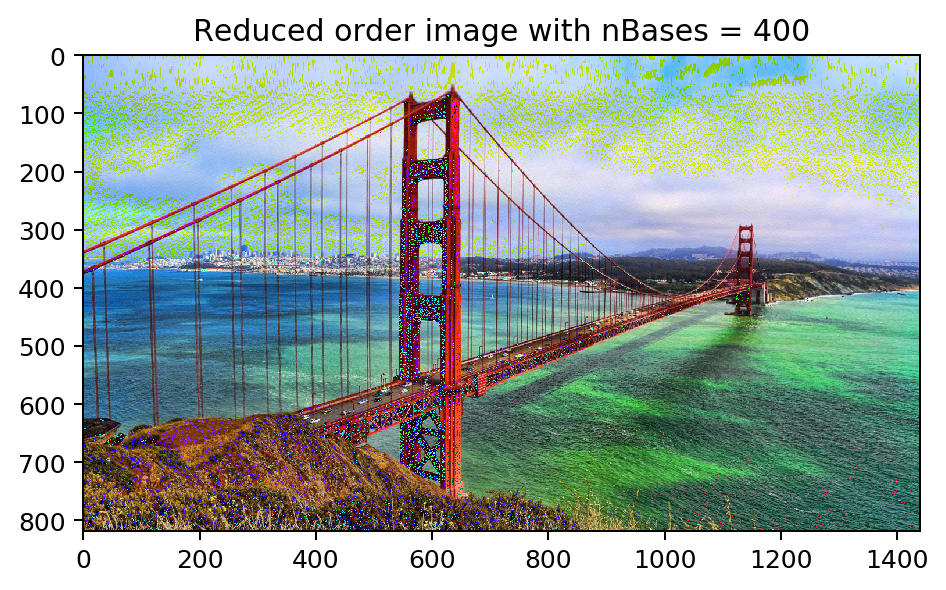

In [8]:
do_rom(nBases)

### 2. k = nBases/5

--------------- nBases = 80 ------------------
The rom-svd image takes 401 KB of memory
The rom-svd image takes  0.12% memory compared to the origanl image


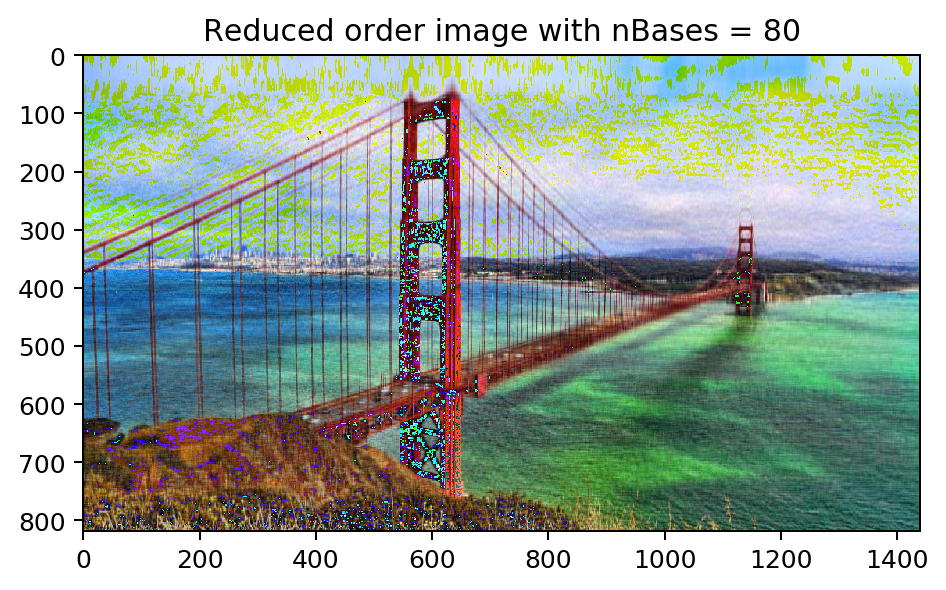

In [9]:
do_rom(int(nBases/5))

### 3. k = nBases/20

--------------- nBases = 20 ------------------
The rom-svd image takes 100 KB of memory
The rom-svd image takes  0.03% memory compared to the origanl image


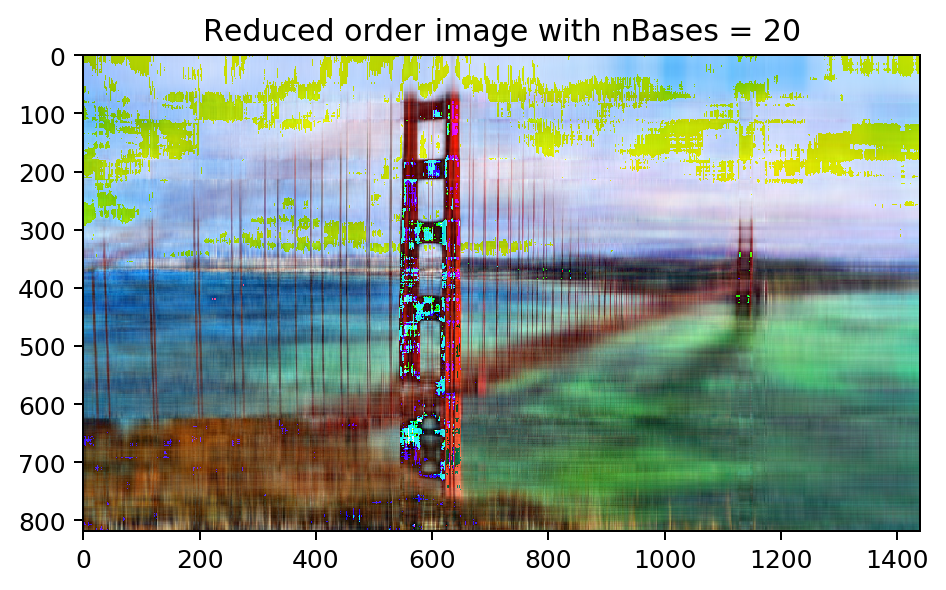

In [10]:
do_rom(int(nBases/20))